In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [18]:
df=pd.read_csv("train_small.csv")
df.head(10)

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,404846,female,56,163.0,61.0,29.0,108.0,40.8,200.0
1,580313,male,44,179.0,87.0,13.0,94.0,40.3,64.0
2,552086,male,41,186.0,84.0,10.0,89.0,39.9,39.0
3,370876,female,38,161.0,58.0,19.0,98.0,40.6,103.0
4,239330,male,57,181.0,77.0,9.0,98.0,40.0,52.0
5,590719,female,24,163.0,59.0,16.0,95.0,40.4,77.0
6,491326,female,72,171.0,70.0,5.0,90.0,38.8,31.0
7,271448,female,48,159.0,62.0,11.0,88.0,39.8,46.0
8,430275,male,65,202.0,99.0,24.0,106.0,40.9,195.0
9,245481,female,47,164.0,64.0,27.0,105.0,40.9,169.0


In [4]:
df.shape

(75000, 9)

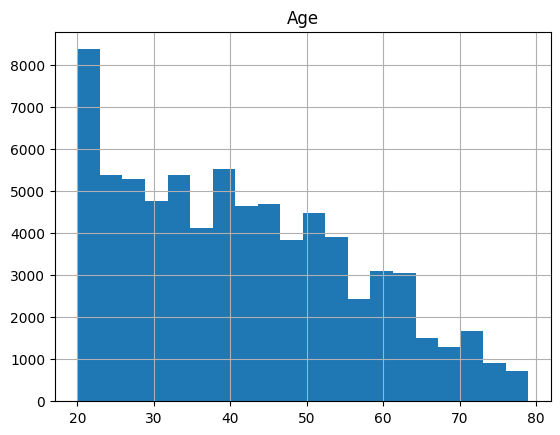

In [5]:
df.hist(column="Age", bins=20)
plt.show()


<Axes: xlabel='Age', ylabel='Calories'>

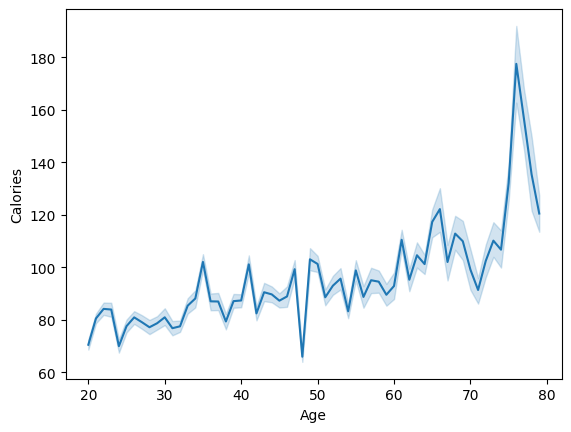

In [6]:
sns.lineplot(x=df["Age"],y=df["Calories"])

In [7]:
df["Sex"]=df["Sex"].map({"male":1,"female":0})

In [8]:
x=df.drop(["id","Calories"],axis=1)
y=df["Calories"]

In [9]:
x.shape

(75000, 7)

In [10]:
y.shape

(75000,)

In [11]:
df.head(5)

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,404846,0,56,163.0,61.0,29.0,108.0,40.8,200.0
1,580313,1,44,179.0,87.0,13.0,94.0,40.3,64.0
2,552086,1,41,186.0,84.0,10.0,89.0,39.9,39.0
3,370876,0,38,161.0,58.0,19.0,98.0,40.6,103.0
4,239330,1,57,181.0,77.0,9.0,98.0,40.0,52.0


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [14]:
x_train.shape

(50250, 7)

In [15]:
x_test.shape

(24750, 7)

In [16]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [23]:
models={
    'lr': LinearRegression(),
    'rd':Ridge(),
    'ls':Lasso(),
    'dtr':DecisionTreeRegressor(),
    'rfr':RandomForestRegressor(n_estimators=20, max_depth=10)
}

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

for name,mod in models.items():
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    print(f"{name} MSE:{mean_squared_error(y_test,y_pred)},score:{r2_score(y_test,y_pred)}")

lr MSE:124.41682348553856,score:0.9681430819995747
rd MSE:124.4167794381865,score:0.9681430932778957
ls MSE:135.56070478150318,score:0.9652896920583559
dtr MSE:37.825464646464646,score:0.9903147927120124
rfr MSE:23.653900610894688,score:0.9939434205838001


In [26]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)

In [27]:
import pickle
pickle.dump(rfr,open("rfr.pkl","wb"))

In [28]:
x_train.to_csv("x_train.csv")